In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import time

import requests

import urllib3
urllib3.disable_warnings()
import numpy as np
# 进度条库
from tqdm import tqdm


conference `https://github.com/SnowOnVolcano/ImageProcessing`

### 算法框架

1. 读取人脸图片和标签,进行灰度化处理
2. 将读入的二维数据信息转化为一维向量，按列组合成原始数据矩阵
3. 对原始矩阵进行归一化处理,使用`PCA`或`LDA`算法对原始数据矩阵进行分析和降维
4. 读取待识别的图像，将其转换成同样的向量表示，遍历训练集合，寻找到与待识别图像的差值小于阈值的图像为识别结构

#### 图像采集

In [3]:
cookies = {
'BDqhfp': '%E7%8B%97%E7%8B%97%26%26NaN-1undefined%26%2618880%26%2621',
'BIDUPSID': '06338E0BE23C6ADB52165ACEB972355B',
'PSTM': '1646905430',
'BAIDUID': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDORZ': 'B490B5EBF6F3CD402E515D22BCDA1598',
'H_PS_PSSID': '35836_35105_31254_36024_36005_34584_36142_36120_36032_35993_35984_35319_26350_35723_22160_36061',
'BDSFRCVID': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'BDSFRCVID_BFESS': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF_BFESS': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'indexPageSugList': '%5B%22%E7%8B%97%E7%8B%97%22%5D',
'cleanHistoryStatus': '0',
'BAIDUID_BFESS': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDRCVFR[dG2JNJb_ajR]': 'mk3SLVN4HKm',
'BDRCVFR[-pGxjrCMryR]': 'mk3SLVN4HKm',
'ab_sr': '1.0.1_Y2YxZDkwMWZkMmY2MzA4MGU0OTNhMzVlNTcwMmM2MWE4YWU4OTc1ZjZmZDM2N2RjYmVkMzFiY2NjNWM4Nzk4NzBlZTliYWU0ZTAyODkzNDA3YzNiMTVjMTllMzQ0MGJlZjAwYzk5MDdjNWM0MzJmMDdhOWNhYTZhMjIwODc5MDMxN2QyMmE1YTFmN2QyY2M1M2VmZDkzMjMyOThiYmNhZA==',
'delPer': '0',
'PSINO': '2',
'BA_HECTOR': '8h24a024042g05alup1h3g0aq0q',
}

#  请求头
headers = {
'Connection': 'keep-alive',
'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
'Accept': 'text/plain, */*; q=0.01',
'X-Requested-With': 'XMLHttpRequest',
'sec-ch-ua-mobile': '?0',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36',
'sec-ch-ua-platform': '"macOS"',
'Sec-Fetch-Site': 'same-origin',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Dest': 'empty',
'Referer': 'https://image.baidu.com/search/index?tn=baiduimage&ipn=r&ct=201326592&cl=2&lm=-1&st=-1&fm=result&fr=&sf=1&fmq=1647837998851_R&pv=&ic=&nc=1&z=&hd=&latest=&copyright=&se=1&showtab=0&fb=0&width=&height=&face=0&istype=2&dyTabStr=MCwzLDIsNiwxLDUsNCw4LDcsOQ%3D%3D&ie=utf-8&sid=&word=%E7%8B%97%E7%8B%97',
'Accept-Language': 'zh-CN,zh;q=0.9',
}
def craw_single_class(keyword, DOWNLOAD_NUM = 200):
    if os.path.exists('dataset/'+keyword):
        print('文件夹 dataset/{} 已存在，之后直接将爬取到的图片保存至该文件夹中'.format(keyword))
    else:
        os.makedirs('dataset/{}'.format(keyword))
        print('新建文件夹：dataset/{}'.format(keyword))
    count = 1
    
    with tqdm(total=DOWNLOAD_NUM, position=0, leave=True) as pbar:
        
        # 爬取第几张
        num = 0
        # 是否继续爬取
        FLAG = True
        while FLAG:
            page = 30 * count
            params = (
                ('tn', 'resultjson_com'),
                ('logid', '12508239107856075440'),
                ('ipn', 'rj'),
                ('ct', '201326592'),
                ('is', ''),
                ('fp', 'result'),
                ('fr', ''),
                ('word', f'{keyword}'),
                ('queryWord', f'{keyword}'),
                ('cl', '2'),
                ('lm', '-1'),
                ('ie', 'utf-8'),
                ('oe', 'utf-8'),
                ('adpicid', ''),
                ('st', '-1'),
                ('z', ''),
                ('ic', ''),
                ('hd', ''),
                ('latest', ''),
                ('copyright', ''),
                ('s', ''),
                ('se', ''),
                ('tab', ''),
                ('width', ''),
                ('height', ''),
                ('face', '0'),
                ('istype', '2'),
                ('qc', ''),
                ('nc', '1'),
                ('expermode', ''),
                ('nojc', ''),
                ('isAsync', ''),
                ('pn', f'{page}'),
                ('rn', '30'),
                ('gsm', '1e'),
                ('1647838001666', ''),
            )

            response = requests.get('https://image.baidu.com/search/acjson', headers=headers, params=params, cookies=cookies)
            if response.status_code == 200:
                try:
                    json_data = response.json().get("data")

                    if json_data:
                        for x in json_data:
                            type = x.get("type")
                            if type not in ["gif"]:
                                img = x.get("thumbURL")
                                fromPageTitleEnc = x.get("fromPageTitleEnc")
                                try:
                                    resp = requests.get(url=img, verify=False)
                                    time.sleep(1)
                                    # print(f"链接 {img}")
                                    # 保存文件名
                                    # file_save_path = f'dataset/{keyword}/{num}-{fromPageTitleEnc}.{type}'
                                    file_save_path = f'dataset/{keyword}/{num}.{type}'
                                    with open(file_save_path, 'wb') as f:                                    
                                        f.write(resp.content)
                                        f.flush()
                                        # print('第 {} 张图像 {} 爬取完成'.format(num, fromPageTitleEnc))
                                        num += 1
                                        pbar.update(1) # 进度条更新

                                    # 爬取数量达到要求
                                    if num > DOWNLOAD_NUM:
                                        FLAG = False
                                        print('{} 张图像爬取完毕'.format(num))
                                        break

                                except Exception:
                                    pass
                except:
                    pass
            else:
                break

            count += 1
            
## 爬取多类
class_list = ['科比','哈登','杰伦布朗','安东尼戴维斯','威斯布鲁克']
for each in class_list:
    craw_single_class(each, DOWNLOAD_NUM = 50)

新建文件夹：dataset/科比


51it [01:01,  1.20s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/哈登


51it [01:01,  1.21s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/杰伦布朗


51it [01:06,  1.30s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/安东尼戴维斯


51it [01:00,  1.18s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/威斯布鲁克


51it [01:00,  1.19s/it]                        

51 张图像爬取完毕


In [27]:
def modify_file(root,src,dst,obj,retain=True):
    '''保留obj中结尾的文件'''
    path = [os.path.join(root,i)for i in [src,dst]]
    print(path[1])
    writeobj = []
    # 读取文件
    with open(path[0],'r') as f:
        readobj = f.readlines()
    # 每行数据
    for line in readobj:
        path_ =line.split(' ')[0]
        for num in obj:
            if path_.split('.')[0].endswith(str(num)):
                writeobj.append(line)
            else:
                continue
    if not retain: # 保留数据/反向删除
        writeobj=list(set(readobj)-set(writeobj))
                
    with open(path[1],'w+') as f:
        for line in writeobj:
                f.writelines(line)
            
    print('label has been modify success in {}'.format(path[1]))
                
obj = [i for i in range(40,51)] 
# 测试集 41~50
modify_file(root='/data0/yy_data/Project/dataset/test_data',src='label.txt',dst='label1.txt',obj=obj)
# 训练集 0~40
modify_file(root='/data0/yy_data/Project/dataset/train_data',src='label.txt',dst='label1.txt',obj=obj,retain=False)

/data0/yy_data/Project/dataset/test_data/label1.txt
label has been modify success in /data0/yy_data/Project/dataset/test_data/label1.txt
/data0/yy_data/Project/dataset/train_data/label1.txt
label has been modify success in /data0/yy_data/Project/dataset/train_data/label1.txt


In [29]:
modify_file(root='/data0/yy_data/Project/dataset/train_data',src='label1.txt',dst='label2.txt',obj='30',retain=False)

/data0/yy_data/Project/dataset/train_data/label2.txt
label has been modify success in /data0/yy_data/Project/dataset/train_data/label2.txt


In [78]:
def modify_img(root,obj):
    '''删除obj中结尾的图片'''
    for classes in os.listdir(root):
        if classes.endswith('.txt'):
            continue
        curr_pth = os.path.join(root,classes)
        for img in os.listdir(curr_pth):
            for num in obj:
                if img.split('.')[0].endswith(num):
                    os.remove(os.path.join(curr_pth,img))
            
obj = [str(i)for i in range(40,51)]
modify_img('/data0/yy_data/Project/dataset/train_data/','40') 

可视化数据集图像

<ipython-input-104-2ad5c210b50d>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


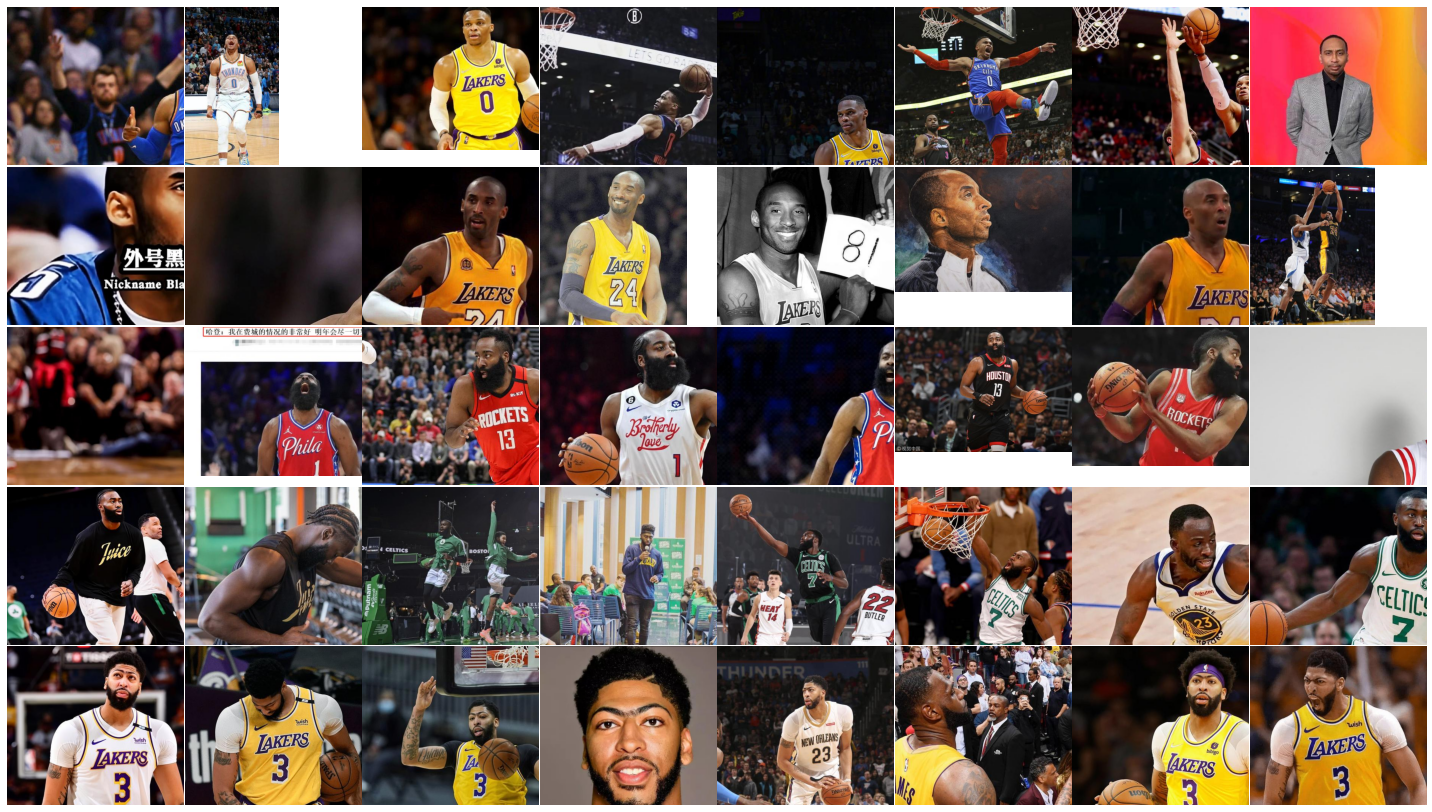

In [104]:
from mpl_toolkits.axes_grid1 import ImageGrid

with open('/data0/yy_data/Project/dataset/train_data/label1.txt') as f:
    path =f.read()
def read_img_N(path,num):
    # 类别下读取指定数量图片
    img_path =[]
    images = []
    classes_path = [os.path.join(path,i) for i in os.listdir(path)]
    for classes in classes_path:
        if classes.endswith('.txt'):
            continue
        # img_path.append(os.listdir(classes)[:num])
        classes_imgs = os.listdir(classes)[:num]
        classes_pathes =[os.path.join(classes,i) for i in classes_imgs]
        img_path.append(classes_pathes)
    for i in range(len(img_path)):
        for j in img_path[i]:
            img=cv2.imread(j)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            images.append(img)
    return images
# 获取到每个列各10个图像
images = read_img_N('/data0/yy_data/Project/dataset/train_data/',8)   
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(5, 8),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                )
# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

图像的尺寸可视化

In [109]:
import pandas as pd
import os
import cv2
import tqdm

def cal_img_size(path):
    df = pd.DataFrame()
    classes_path = [os.path.join(path,i) for i in os.listdir(path)]
    for classes in classes_path:
        signal_class = classes.split('/')[-1]
        if classes.endswith('.txt') or classes.endswith('.pdf'):
            pass
        else:
            for file in os.listdir(classes):
                os.chdir(classes)  # 更改路径     
                img = cv2.imread(file)
                df = df.append({'类别':signal_class,'文件名':file,'宽':img.shape[1],'高':img.shape[0]}, ignore_index=True)
    return df
df = cal_img_size('/data0/yy_data/Project/dataset/train_data/')

<ipython-input-109-2d96386558d5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':signal_class,'文件名':file,'宽':img.shape[1],'高':img.shape[0]}, ignore_index=True)
<ipython-input-109-2d96386558d5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':signal_class,'文件名':file,'宽':img.shape[1],'高':img.shape[0]}, ignore_index=True)
<ipython-input-109-2d96386558d5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':signal_class,'文件名':file,'宽':img.shape[1],'高':img.shape[0]}, ignore_index=True)
<ipython-input-109-2d96386558d5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

In [110]:
df

,类别,文件名,宽,高
0,Wsetbrook,Wsetbrook7.jpg,870,621
1,Wsetbrook,Wsetbrook5.jpg,250,500
2,Wsetbrook,Wsetbrook6.jpg,640,380
3,Wsetbrook,Wsetbrook39.jpg,500,888
4,Wsetbrook,Wsetbrook27.jpg,800,1199
...,...,...,...,...
155,Davis,Davis11.jpg,625,500
156,Davis,Davis39.jpg,750,500
157,Davis,Davis38.jpg,773,500
158,Davis,Davis25.jpg,640,429


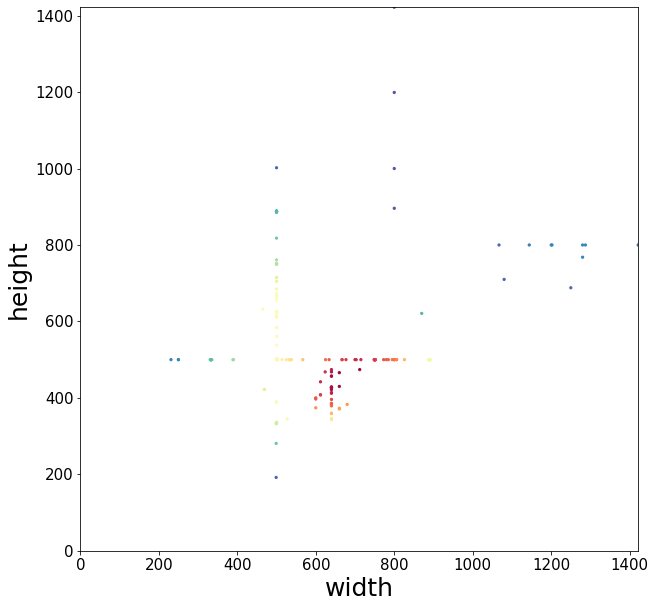

In [111]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['宽']
y = df['高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))

plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')


plt.tick_params(labelsize=15)

xy_max = max(max(df['宽']), max(df['高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

# plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

#### 标签制作

In [36]:
# os.listdir('dataset/train_data/')
# os.chdir('dataset/train_data/')
os.getcwd()
paths = os.listdir(os.getcwd()) 
# 通过 迭代返回不同类别下的标签 读取文件夹下的文件名称

def img_rename(file):
    R'''根据类别将图片以 类别+num.jpg的形式更改名称'''
    # 更改工作路径,完成后要更改回去
    os.chdir(file)
    classes_name = file.split('/')[-1]
    img_name = os.listdir(file)
    # 迭代文件名称进行修改
    for i in img_name:
        os.rename(i,classes_name+i.split('.')[0]+'.jpg')
    print('{} img has been rename success!'.format(classes_name))


def write_label(file,path):
    '''读取数据集图片,根据类别打标签'''
    classes_path = [os.path.join(path,i) for i in os.listdir(path)]
    # 使用a的时候是添加数据不会覆盖
    with open(os.path.join(path,file),'w+') as f:
        # 文件类别
        for index,classes in enumerate(classes_path):
            #img_rename(classes)
            if( classes.endswith('.txt')):
                continue
            path = os.listdir(classes)
           
            img_path = [os.path.join(classes,i)for i in path] # 图像绝对路径
            for i in img_path:
                if i.endswith('.jpg'):
                    f.writelines(i+' '+str(index)+'\n')
                else:
                    continue
path = '/data0/yy_data/Project/dataset/train_data/'      
write_label(file='label.txt',path=path)

**数据集形式**
- train_dataset:
    0~39 共 40张照片
    - Davis
    - Wsetbrook
    - kobe
    - JaylenBrown
    - Harden

- test_dataset:
    41~50 共 10张照片
    - Davis
    - Wsetbrook
    - kobe
    - JaylenBrown
    - Harden


#### 图像的加载与矩阵列表建立

In [2]:
IMG_SIZE = (400, 700)
# 训练集每个类别 51张图片
DIM = 40
def load_img(file_name):
    """
    载入图像，统一尺寸，灰度化处理，直方图均衡化
    :param file_name: 图像文件名
    :return: 图像矩阵
    """
    t_img_mat = cv2.imread(file_name)  # 载入图像
    t_img_mat = cv2.resize(t_img_mat, IMG_SIZE)  # 统一尺寸
    t_img_mat = cv2.cvtColor(t_img_mat, cv2.COLOR_RGB2GRAY)  # 转化为灰度图
    img_mat = cv2.equalizeHist(t_img_mat)  # 直方图均衡
    return img_mat


def create_img_mat(dir_name, algorithm=0):
    """
    生成图像样本矩阵，组织形式为行为属性，列为样本
    :param dir_name: 包含训练数据集的图像文件夹路径
    :param algorithm: 识别算法,0-EigenFace,1-Fisher,2-LBP
    :return: 样本矩阵，标签矩阵
    """
    data_mat = np.zeros((IMG_SIZE[0] * IMG_SIZE[1], 1))
    label = []
    data_list = []
    # 类别文件,标签
    for file in os.listdir(dir_name):
        current_path = os.path.join(dir_name,file)
        # 标签文件
        if file.endswith('.txt'):
            with open(current_path,'r') as f:
                labels = f.readlines()
                for label_ in labels:
                    label.append(label_.split(' ')[1])
            # num ,1
            label = np.stack(label).reshape(1,-1)

        # 类别文件
        else :
            for img in os.listdir(current_path):     
                t_img_mat=load_img(current_path+'/'+img)
                # h*w,1 单个图像数据
                img_mat = np.reshape(t_img_mat, (-1, 1))  
                if algorithm == 0:
                    # 将数据按列堆放 img1,img2...
                    data_mat = np.column_stack((data_mat, img_mat))
                # else:
                #     data_mat = img_mat if t_index == 0 else np.column_stack((data_mat, img_mat))

            data_list.append(data_mat[:, 1:] if algorithm == 0 else data_mat)
    return data_mat[:, 1:], label, data_list
path = '/data0/yy_data/Project/dataset/train_data/' 

#### 图像列表建立

In [3]:
class AlgorithmLbp(object):
    def __init__(self):
        self.table = {}
        self.ImgSize = IMG_SIZE
        self.BlockNum = DIM
        self.count = 0

    def load_img_list(self, dir_name):
        """
        加载图像矩阵列表
        :param dir_name:文件夹路径
        :return: 包含最原始的图像矩阵的列表和标签矩阵
        """
        img_list = []
        label = []
        for file in os.listdir(dir_name):
            current_path = os.path.join(dir_name,file)
            # 标签文件
            if file.endswith('.txt'):
                with open(current_path,'r') as f:
                    labels = f.readlines()
                    for label_ in labels:
                        label.append(label_.split(' ')[1])
                # num ,1
                label.append(np.stack(label).reshape(1,-1))
            # 类别文件
            else :
                for img in os.listdir(current_path):     
                    t_img_mat=load_img(current_path+'/'+img)
                    # h*w,1
                    img_mat = np.reshape(t_img_mat, (-1, 1))  
                    img_list.append(img_mat)
        return img_list, label

#### 主要算法

In [4]:
root='/home/yy/FGVC/Digital_Image_Demo/'
def algorithm_pca(data_mat,root):
    """
    PCA函数,用于数据降维
    :param data_mat: 样本矩阵
    :return: 降维后的样本矩阵和变换矩阵
    """
    mean_mat = np.mat(np.mean(data_mat, 1)).T
    cv2.imwrite(root+'mean_face.jpg', np.reshape(mean_mat, IMG_SIZE))
    # 去中心化
    diff_mat = data_mat - mean_mat
    # print('差值矩阵', diff_mat.shape, diff_mat)
    cov_mat = (diff_mat.T * diff_mat) / float(diff_mat.shape[1])
    # print('协方差矩阵', cov_mat.shape, cov_mat)

    eig_vals, eig_vecs = np.linalg.eig(np.mat(cov_mat))
    # print('特征值（所有）：', eig_vals, '特征向量（所有）：', eig_vecs.shape, eig_vecs)

    eig_vecs = diff_mat * eig_vecs
    eig_vecs = eig_vecs / np.linalg.norm(eig_vecs, axis=0)
    eig_val = (np.argsort(eig_vals)[::-1])[:DIM]
    eig_vec = eig_vecs[:, eig_val]
    # print('特征值（选取）：', eig_val, '特征向量（选取）：', eig_vec.shape, eig_vec)
    for i in range(0, eig_vec.shape[1]):
        # print('-----',eig_vec.shape)
        # print('-----', eig_vec[:, i].shape)
        # print('-----',np.reshape(eig_vec[:,i], IMG_SIZE).shape)
        pic = np.reshape(eig_vec[:,i], IMG_SIZE)
        # print(pic)
        pic = 10000 * pic
        # print(pic)
        # pic *= (pic > 0)
        # pic = pic * (pic <= 255) + 255 * (pic > 255)
        pic = pic.astype(np.uint8)
        # print(pic)
        cv2.imwrite(root+'face_test/mean_face' + str(i) + '.jpg', pic)
    low_mat = eig_vec.T * diff_mat

    return low_mat, eig_vec

def algorithm_lda(data_list,root):
    """
    多分类问题的线性判别分析算法
    :param data_list: 样本矩阵列表
    :return: 变换后的矩阵列表和变换矩阵
    """
    n = data_list[0].shape[0]
    Sw = np.zeros((n, n))
    u = np.zeros((n, 1))
    Sb = np.zeros((n, n))
    N = 0
    mean_list = []
    sample_num = []

    for data_mat in data_list:
        mean_mat = np.mat(np.mean(data_mat, 1)).T
        cv2.imwrite(root+'fisher_face.jpg', np.reshape(mean_mat, IMG_SIZE))
        mean_list.append(mean_mat)
        sample_num.append(data_mat.shape[1])

        data_mat = data_mat - mean_mat
        Sw += data_mat * data_mat.T
    # print('Sw的维度：', Sw.shape)

    for index, mean_mat in enumerate(mean_list):
        m = sample_num[index]
        u += m * mean_mat
        N += m
    u = u / N
    # print('u的维度：', u.shape)

    for index, mean_mat in enumerate(mean_list):
        m = sample_num[index]
        sb = m * (mean_mat - u) * (mean_mat - u).T
        Sb += sb
    # print('Sb的维度：', Sb.shape)

    eig_vals, eig_vecs = np.linalg.eig(np.mat(np.linalg.inv(Sw) * Sb))
    eig_vecs = eig_vecs / np.linalg.norm(eig_vecs, axis=0)
    eig_val = (np.argsort(eig_vals)[::-1])[:DIM]
    eig_vec = eig_vecs[:, eig_val]
    # print('选取的特征值：', eig_val.shape)
    # print('变换矩阵维度：', eig_vec.shape)
    for i in range(0, eig_vec.shape[1]):
        # print('-----',eig_vec.shape)
        # print('-----', eig_vec[:, i].shape)
        # print('-----',np.reshape(eig_vec[:,i], IMG_SIZE).shape)
        pic = np.reshape(eig_vec[:,i], IMG_SIZE)
        print(pic)
        pic = 10000 * pic
        print(pic)
        pic *= (pic > 0)
        pic = pic * (pic <= 255) + 255 * (pic > 255)
        pic = pic.astype(np.uint8)
        # print(pic)
        cv2.imwrite(root+'face_test/fisher_face' + str(i) + '.jpg', pic)

    trans_mat_list = []
    for data_mat in data_list:
        trans_mat_list.append(eig_vec.T * data_mat)
    # print('trans_mat_list=', len(trans_mat_list))
    # with open('./data/face_test/class.txt', 'w') as f:
    #     f.write(str(trans_mat_list))
    return trans_mat_list, eig_vec


class AlgorithmLbp(object):
    def __init__(self):
        self.table = {}
        self.ImgSize = IMG_SIZE
        self.BlockNum = 5
        self.count = 0

    def load_img_list(self, dir_name):
        """
        加载图像矩阵列表
        :param dir_name:文件夹路径
        :return: 包含最原始的图像矩阵的列表和标签矩阵
        """
        img_list = []
        label = []
        for parent, dir_names, file_names in os.walk(dir_name):
            for t_dir_name in dir_names:
                for sub_parent, sub_dir_name, sub_filenames in os.walk(parent + '/' + t_dir_name):
                    for file_name in sub_filenames:
                        if not file_name.endswith('.jpg'):
                            continue
                        if file_name.endswith('.10.jpg'):
                            continue
                        img_list.append(load_img(sub_parent + '/' + file_name))  
                        label.append(sub_parent + '/' + file_name)
        return img_list, label

    def get_hop_counter(self, num):
        """
        计算二进制序列是否只变化两次
        :param num: 数字
        :return: 01变化次数
        """
        bin_num = bin(num)
        bin_str = str(bin_num)[2:]
        n = len(bin_str)
        if n < 8:
            bin_str = "0" * (8 - n) + bin_str
        n = len(bin_str)
        counter = 0
        for i in range(n):
            if i != n - 1:
                if bin_str[i + 1] != bin_str[i]:
                    counter += 1
            else:
                if bin_str[0] != bin_str[i]:
                    counter += 1
        return counter

    def get_table(self):
        """
        生成均匀对应字典
        :return: 均匀LBP特征对应字典
        """
        counter = 1
        for i in range(256):
            if self.get_hop_counter(i) <= 2:
                self.table[i] = counter
                counter += 1
            else:
                self.table[i] = 0
        return self.table

    def get_lbp_feature(self, img_mat):
        """
        计算LBP特征
        :param img_mat:图像矩阵
        :return: LBP特征图
        """
        # cv2.imwrite('./data/face_test/lbp_img' + str(self.count) + '.jpg', img_mat)
        m = img_mat.shape[0]
        n = img_mat.shape[1]
        neighbor = [0] * 8
        feature_map = np.mat(np.zeros((m, n)))
        t_map = np.mat(np.zeros((m, n)))
        for y in range(1, m - 1):
            for x in range(1, n - 1):
                neighbor[0] = img_mat[y - 1, x - 1]
                neighbor[1] = img_mat[y - 1, x]
                neighbor[2] = img_mat[y - 1, x + 1]
                neighbor[3] = img_mat[y, x + 1]
                neighbor[4] = img_mat[y + 1, x + 1]
                neighbor[5] = img_mat[y + 1, x]
                neighbor[6] = img_mat[y + 1, x - 1]
                neighbor[7] = img_mat[y, x - 1]
                center = img_mat[y, x]
                temp = 0
                for k in range(8):
                    temp += (neighbor[k] >= center) * (1 << k)
                feature_map[y, x] = self.table[temp]
                t_map[y, x] = temp
        feature_map = feature_map.astype('uint8')  # 数据类型转换为无符号8位型，如不转换则默认为float64位，影响最终效果
        t_map = t_map.astype('uint8')
        # print('t_map', t_map.shape)
        # cv2.imwrite('./data/face_test/lbp_face' + str(self.count) + '.jpg', t_map)
        # print('feature_map', feature_map.shape)
        # cv2.imwrite('./data/face_test/lbp_map' + str(self.count) + '.jpg', feature_map)
        self.count += 1
        return feature_map

    def get_hist(self, roi):
        """
        计算直方图
        :param roi:图像区域
        :return: 直方图矩阵
        """
        hist = cv2.calcHist([roi], [0], None, [59], [0, 256])  # 第四个参数是直方图的横坐标数目，经过均匀化降维后这里一共有59种像素
        return hist

    def compare(self, sampleImg, test_img):
        """
        比较函数,这里使用的是欧氏距离排序,也可以使用KNN,在此处更改
        :param sampleImg: 样本图像矩阵
        :param test_img: 测试图像矩阵
        :return: k2值
        """
        testFeatureMap = self.get_lbp_feature(test_img)
        sampleFeatureMap = self.get_lbp_feature(sampleImg)
        # 计算步长，分割整个图像为小块
        ystep = int(self.ImgSize[0] / self.BlockNum)
        xstep = int(self.ImgSize[1] / self.BlockNum)

        k2 = 0
        for y in range(0, self.ImgSize[0], ystep):
            for x in range(0, self.ImgSize[1], xstep):
                testroi = testFeatureMap[y:y + ystep, x:x + xstep]
                sampleroi = sampleFeatureMap[y:y + ystep, x:x + xstep]
                testHist = self.get_hist(testroi)
                sampleHist = self.get_hist(sampleroi)
                k2 += np.sum((sampleHist - testHist) ** 2) / np.sum((sampleHist + testHist))
        # print('k2的值为', k2)
        return k2

    def predict(self, dir_path, test_path):
        """
        预测函数
        :param dir_path:样本图像文件夹路径
        :param test_path: 测试图像文件路径
        :return: 最相近图像名称
        """
        global acc_count
        self.table = self.get_table()

        test_img_list = []
        test_labels = []
        for parent, dir_names, file_names in os.walk(test_path):
            for t_dir_name in dir_names:
                for sub_parent, sub_dir_name, sub_filenames in os.walk(parent + '/' + t_dir_name):
                    for file_name in sub_filenames:
                        if not file_name.endswith('.jpg'):
                            continue
                        if file_name.endswith('.10.jpg'):
                            test_img_list.append(load_img(sub_parent + '/' + file_name))
                            test_labels.append(sub_parent.split('/')[-1])

        time_1 = int(round(time.time() * 1000))

        img_list, label = self.load_img_list(dir_path)

        time_2 = int(round(time.time() * 1000))
        algorithm_time = time_2 - time_1
        print("Algorithm_LBPH Finished in: ", algorithm_time)
        print("start comparing ......")

        acc_count = 0
        result_list = []
        time_1 = int(round(time.time() * 1000))
        for i in range(0, len(test_img_list)):
            test_img = test_img_list[i]
            k2_list = []
            for img in img_list:
                k2 = self.compare(img, test_img)
                k2_list.append(k2)
            result = label[np.argsort(k2_list)[0]]
            result = result.split('/')[-2]
            result_list.append(result)
            acc_count = acc_count + 1 if result == test_labels[i] else acc_count
            # print(result, '：', test_labels[i])
        time_2 = int(round(time.time() * 1000))
        compare_time = time_2 - time_1

        print("Comparing Finished in: ", compare_time)
        print("---- Accuracy is: ", acc_count / len(result_list), " ----")

        return result_list

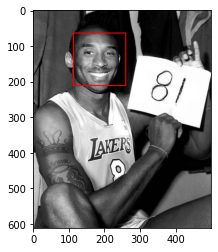

In [33]:
# 人脸检测
# 分类文件路径
# https://github.com/opencv/opencv/tree/master/data/haarcascades
import cv2
import matplotlib.pyplot as plt

def face_detect(img):
    r'''检测单个图片'''
    img = cv2.imread(img)
    origi_img = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    detect = cv2.CascadeClassifier('face_default.xml')
    face = detect.detectMultiScale(gray,1.1,5,cv2.CASCADE_SCALE_IMAGE,(100,100),(300,300))
    # face 返回多个图像框
    for x,y,w,h in face:
        cv2.rectangle(origi_img,(x,y),(x+w,y+h),color=(0,0,255),thickness=2)
    plt.imshow(origi_img[:,:,::-1])
face_detect('9.png')

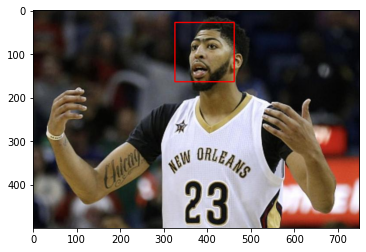

In [34]:
face_detect("/data0/yy_data/Project/dataset/train_data/Davis/Davis5.jpg")

In [ ]:
# 检测视频
cap = cv2.VideoCapture(0)
while True:
    flag,frame = cap.read()
    if not flag:
        break
    face_detect(frame)
    if ord('q') == cv2.waitKey(0):
        break
cv2.destroyAllWindows()
cap.release()
    

['/data0/yy_data/Project/dataset/train_data/Wsetbrook',
 '/data0/yy_data/Project/dataset/train_data/kobe',
 '/data0/yy_data/Project/dataset/train_data/Harden',
 '/data0/yy_data/Project/dataset/train_data/JaylenBrown',
 '/data0/yy_data/Project/dataset/train_data/Davis']

In [40]:
#脸部检测函数
def face_detect_demo(image):
  
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier("face_default.xml")
    faces = face_detector.detectMultiScale(gray, 1.2, 6)
    # 如果未检测到面部，则返回原始图像
    if (len(faces) == 0):
        return None, None
    # 目前假设只有一张脸，xy为左上角坐标，wh为矩形的宽高
    (x, y, w, h) = faces[0]
    # 返回图像的脸部部分
    return gray[y:y + w, x:x + h], faces[0]

def ReFileName(dirPath):
    """
    :param dirPath: 文件夹路径
    :return:
    """
    # 对目录下的文件进行遍历
    faces=[]
    for file in os.listdir(dirPath):
        # 判断是否是文件
        if os.path.isfile(os.path.join(dirPath, file)) == True:
          # 路径的主文件
           c= os.path.basename(file)
           name = dirPath + '/' + c
           img = cv2.imread(name)
           # 检测脸部
           face, rect = face_detect_demo(img)
           # 我们忽略未检测到的脸部
           if face is not None:
               # 将脸添加到脸部列表并添加相应的标签
               faces.append(face)
    return faces


dirkobe= '/data0/yy_data/Project/dataset/train_data/kobe'#文件路径
kobe=ReFileName(dirkobe)#调用函数

labelKobe=np.array([0 for i in range(len(kobe))])#标签处理
# #刘亦菲照读取
dirPathDavis = '/data0/yy_data/Project/dataset/train_data/Davis'#文件路径
Davis=ReFileName(dirPathDavis)#调用函数
labelDavis=np.array([1 for i in range(len(Davis))])#标签处理

#拼接并打乱数据特征和标签
x=np.concatenate((kobe,Davis),axis=0)
y=np.concatenate((labelKobe,labelDavis),axis=0)

index = [i for i in range(len(y))] # test_data为测试数据
np.random.seed(1)
np.random.shuffle(index) # 打乱索引
train_data = x[index]
train_label = y[index]

#分类器
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(train_data, train_label)
# 保存训练数据
recognizer.write('train.yml')

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


###### 测试文件

In [39]:
root = '/data0/yy_data/Project/dataset/train_data'
# 类别文件
classes_path = [os.path.join(root,i) for i in os.listdir(root) if os.path.isdir(os.path.join(root,i))]
classes_ =[]
labels = []
for classes in classes_path:
    signal_class = ReFileName(classes)
    signal_label = np.array([0 for i in range(len(signal_class))])#标签处理
    classes_.append(signal_class)
    labels.append(signal_label)
#拼接并打乱数据特征和标签
x=np.concatenate(classes_,axis=0)
y=np.concatenate(labels,axis=0)

index = [i for i in range(len(y))] # test_data为测试数据
np.random.seed(1)
np.random.shuffle(index) # 打乱索引
train_data = x[index]
train_label = y[index]

#分类器
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(train_data, train_label)
# 保存训练数据
recognizer.write('train1.yml')


# test_img = cv2.imread("9.png")
# plt.imshow(predict(test_img,'train1.yml')[:,:,::-1])

22
11
11
19
25


In [38]:
test_img = cv2.imread("/data0/yy_data/Project/dataset/train_data/Davis/Davis5.jpg")
plt.imshow(predict(test_img,'train1.yml')[:,:,::-1])

error: OpenCV(4.5.4-dev) /tmp/pip-req-build-iefu5nf2/opencv/modules/core/src/matrix.cpp:250: error: (-215:Assertion failed) s >= 0 in function 'setSize'


(0, 0.0)


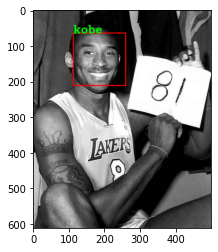

In [26]:
import cv2
#人脸检测函数
def face_detect_demo(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier("face_default.xml")
    faces = face_detector.detectMultiScale(gray, 1.2, 6)
    # 如果未检测到面部，则返回原始图像
    if (len(faces) == 0):
        return None, None
    # 目前假设只有一张脸，xy为左上角坐标，wh为矩形的宽高
    (x, y, w, h) = faces[0]
    # 返回图像的脸部部分
    return gray[y:y + w, x:x + h], faces[0]
# 根据给定的人脸（x，y）坐标和宽度高度在图像上绘制矩形
def draw_rectangle(img, rect):
    (x, y, w, h) = rect#矩形框
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# 根据给定的人脸（x，y）坐标写出人名
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

# 此函数识别图像中的人物并在脸部周围绘制一个矩形及其人名
facelabel = ["kobe", "Davis"]#人物名
def predict(image,train_file): 
    #导入训练结果
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(train_file)#读取前文训练的结果
    # 生成图像的副本，保留原始图像
    img = image.copy()
    # 检测人脸区域
    face, rect = face_detect_demo(img)#face_detect_demo前面的人脸检测函数
    #print(rect)=[x,y,w,h]
    # 预测人脸名字
    label = recognizer.predict(face)
    print(label)#label[0]为名字，label[1]可信度数值越低，可信度越高（
    if label[1]<=100:
        # 获取由人脸识别器返回的相应标签的人名
        label_text = facelabel[label[0]]

        # 在检测到的脸部周围画一个矩形
        draw_rectangle(img, rect)
        # 标出预测的人名
        draw_text(img, label_text, rect[0], rect[1])
        # 返回预测的图像
        return img
    else:
        # 在检测到的脸部周围画一个矩形
        draw_rectangle(img, rect)
        # 标出预测的人名
        draw_text(img, "not find", rect[0], rect[1])
        # 返回预测的图像
        return img

test_img = cv2.imread("9.png")
plt.imshow(predict(test_img,'train1.yml')[:,:,::-1])

(1, 0.0)


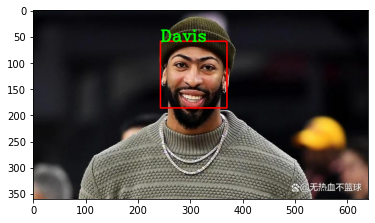

In [27]:
test_img = cv2.imread("/data0/yy_data/Project/dataset/train_data/Davis/Davis6.jpg")
plt.imshow(predict(test_img,'train.yml')[:,:,::-1])

(1, 83.53059352140343)


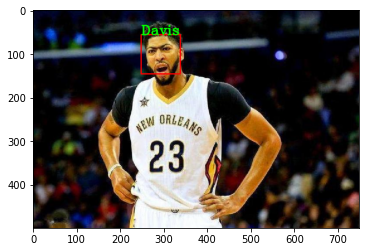

In [32]:
test_img = cv2.imread("/data0/yy_data/Project/dataset/test_data/Davis/Davis47.jpg")
plt.imshow(predict(test_img,'train.yml')[:,:,::-1])

4
122.73351582820185
[ 19 291  64  64]


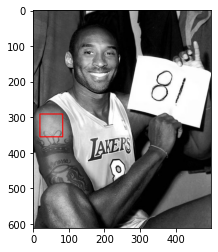

In [59]:
from PIL import Image
import os
def face_detect_img(img,class_file):
    '''单个图片脸部检测'''
    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier(class_file)
    faces = face_detector.detectMultiScale(gray)
    # 如果未检测到面部，则返回原始图像
    if (len(faces) == 0):
        return None, None
    # 目前假设只有一张脸，xy为左上角坐标，wh为矩形的宽高
    (x, y, w, h) = faces[0]
    # 返回图像的脸部部分
    return gray[y:y + w, x:x + h], faces[0]
    

def read_classes_label(path,class_file):
    r'''根据类别文件读取图片
    返回人脸信息
    '''
    # 单个类别下的图片路径
    facees = []
    img_pathes = [os.path.join(path,img)for img in os.listdir(path)]
    for img in img_pathes:
        face,rect=face_detect_img(img,class_file)
        # 忽略未检测到的脸部
        if face is not None:
            facees.append(face)

    return facees
    
    # # 加载分类器
    # face_detect = cv2.CascadeClassifier(class_file)
    # for classes in os.listdir(path):
    #     if  classes.endswith('.txt') or classes.endswith('ml'):
    #         continue
    #     else: # 类别文件
    #         curr_path = os.path.join(path,classes)
    #         imgpaths = [i for i in os.listdir(curr_path)]
    #         for i in imgpaths:
    #             id=int(class_set[classes])
    #             # 读取图片
    #             img = Image.open(os.path.join(curr_path,i)).convert('L') 
    #             img_numpy = np.array(img,'uint8')
    #             faces = face_detect.detectMultiScale(img_numpy)
    #             for (x,y,w,h) in faces:
    #                 face_mat.append(img_numpy[y:y+h,x:x+w])
    #                 label.append(id)      
    # return face_mat,label

def trainset_loader(root,class_filer,train_file):
    id= 0
    x =[]
    y= []
    print('\tread classes')
    for classes in os.listdir(root):
        curr_path = os.path.join(root,classes)
        # 根据类别文件读取不同类别的数据
        if os.path.isdir(curr_path):
            print('read {} info'.format(curr_path).split('/')[-1])
            # 单个类别的脸信息
            classes_face =read_classes_label(curr_path,class_filer)
            labels = [id for i in range(len(classes_face))]
            id+=1
            x.append(classes_face)
            y.append(labels)
    # x= np.concatenate(classes_face,axis=0)
    # y = np.concatenate(labels,axis=0)
    x= np.array(classes_face,dtype=object)
    y = np.array(labels)
    # 索引
    index = [i for i in range(y.shape[0])]
    # 随机数
    np.random.seed(1)
    # 打乱索引
    np.random.shuffle(index)
    train_data= x[index]
    train_label = y[index]
    # 分类器
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.train(train_data, train_label)
    # 保存训练数据
    recognizer.write(os.path.join(root+train_file))
    print('train data has ben saved!')
root='/data0/yy_data/Project/dataset/train_data/'
class_filer='face_default.xml'
train_filer='trainer.yml'
# trainset_loader(root,class_filer,train_filer)
# # 数据训练
# def train(path,class_file,class_set):
#     print('get images info')
#     face_mat,label =read_img_label(path,class_file,class_set)  
#     # 加载识别器
#     recognizer = cv2.face.LBPHFaceRecognizer_create()
#     # 训练
#     print('training!!!')
#     recognizer.train(face_mat,np.array(label))
#     # 保存文件
#     recognizer.write(path+'/trainer.yml')
#     print('train file has been saved!')
# train('/data0/yy_data/Project/dataset/train_data/','face_default.xml',class_set) 
# 数据预测
# def predict(testpath):


def predict_signal_img(img,class_file):
    # temp_img = img.copy()
    face,rect = face_detect_img(img,class_file)
    #导入训练结果
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read('/data0/yy_data/Project/dataset/train_data/trainer.yml')#读取前文训练的结果
    id,confidence = recognizer.predict(face)
    print(id)
    print(confidence)
    print(rect)
    x,y,w,h= rect
    img = cv2.imread(img)
    # 画矩形
    cv2.rectangle(img,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
    # cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (128, 128, 0), 2)
    plt.imshow(img)
        
        
predict_signal_img('9.png','face_default.xml')       



In [32]:
x=[[1],[2],[3]]
x = np.concatenate(x,axis=0)
x

array([1, 2, 3])

In [25]:
x= [i for i in range(10)]
x = np.array(x)
len(x)

10

In [15]:
# 类别名称与id对于字典
def class_id(path,file):
    class_set={}
    r'''将类别和id对应写入json文件中'''
    index = 0
    for classes in os.listdir(path):
        if os.path.isdir(os.path.join(path,classes)):
            class_set[classes]=str(index)
            index+=1
        else:
            pass
    write_path = os.path.join(path,file)
    with open(write_path,'w') as w:
        for key,val in class_set.items():
            w.writelines(key+" "+val+'\n')
    print('has written in {}'.format(write_path))
    return class_set  
class_set  =class_id(path='/data0/yy_data/Project/dataset/train_data/',file='class_id.txt')

has written in /data0/yy_data/Project/dataset/train_data/class_id.txt


In [22]:
# 查看下载的包路径
# !pip show opencv-python
os.path.isfile()

#### 算法比较

In [5]:
def method_compare(mat_list, test_img_vec, algorithm=0):
    """
    比较函数,这里只是用了最简单的欧氏距离比较,还可以使用KNN等方法,如需修改修改此处即可
    :param mat_list: 样本向量集
    :param test_img_vec: 测试图像向量
    :param algorithm: 识别算法,0-EigenFace,1-Fisher,2-LBP
    :return: 与测试图片最相近的图像文件名的index
    """
    dis_list = []
    if algorithm == 0:
        for sample_vec in mat_list.T:
            dis_list.append(np.linalg.norm(test_img_vec - sample_vec))

    elif algorithm == 1:
        # print('mat_list.len=', len(mat_list))
        for trans_mat in mat_list:
            # print('trans_mat.shape=', trans_mat.shape)
            for sample_vec in trans_mat.T:
                dis_list.append(np.linalg.norm(test_img_vec - sample_vec))

    # print('disList=', len(dis_list))
    index = np.argsort(dis_list)[0]
    return index

#### 预测

主要流程:
1. 加载训练数据
2. 通过选定的算法计算
3. 载入验证数据

In [8]:
def method_predict(data_path, test_path, algorithm=0):
    """
    预测函数
    :param data_path: 包含训练数据集的文件夹路径
    :param test_path: 测试图像文件名
    :param algorithm: 识别算法,0-EigenFace,1-Fisher,2-LBP
    :return: 预测结果
    """
    global result_list, acc_list, acc_count, algorithm_time, compare_time

    if algorithm == 2:
        result_list = AlgorithmLbp().predict(data_path, test_path)
    else:
        print("start loading images ......")
        data_mat, label, data_list = create_img_mat(data_path, algorithm)
        print("start calculating ", "Algorithm_PCA" if algorithm == 0 else "Algorithm_LDA", " ......")
        # print('标签信息：', label)
        time_1 = int(round(time.time() * 1000))
        if algorithm == 0:
            mat_list, eig_vec = algorithm_pca(data_mat)
        else:
            mat_list, eig_vec = algorithm_lda(data_list)
        time_2 = int(round(time.time() * 1000))
        algorithm_time = time_2 - time_1
        print("Algorithm_PCA Finished in: " if algorithm == 0 else "Algorithm_LDA Finished in: ", algorithm_time)
        print("start comparing ......")

        test_img_list = []
        test_labels = []
        
        for parent, dir_names, file_names in os.walk(test_path):
            for t_dir_name in dir_names:
                for sub_parent, sub_dir_name, sub_filenames in os.walk(parent + '/' + t_dir_name):
                    for file_name in sub_filenames:
                        if not file_name.endswith('.jpg'):
                            continue
                        else:
                            test_img_mat = np.reshape(load_img(sub_parent + '/' + file_name), (-1, 1))
                            test_img_vec = np.reshape((eig_vec.T * test_img_mat), (1, -1))
                            test_img_list.append(test_img_vec)
                            test_labels.append(sub_parent.split('/')[-1])

        time_1 = int(round(time.time() * 1000))
        result_list = []
        acc_count = 0
        for i in range(0, len(test_img_list)):
            index = method_compare(mat_list, test_img_list[i], algorithm)
            # print(index,":",len(label))
            if index > len(label):
                continue
            result = label[index]
            result = result.split('/')[-2]
            result_list.append(result)
            acc_count = acc_count + 1 if result == test_labels[i] else acc_count
            # print(result, '：', test_labels[i])
        time_2 = int(round(time.time() * 1000))
        compare_time = time_2 - time_1
        print("Comparing Finished in: ", compare_time)
        print("---- Accuracy is: ", acc_count / len(result_list), " ----")
    return result_list
method_predict('/data0/yy_data/Project/dataset/train_data/', '/data0/yy_data/Project/dataset/test_data/', algorithm=0)

start loading images ......


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [9]:
import torch
device = torch.devide
def process_image(image):
    r'''处理图像'''
     # 记录该帧开始处理的时间
    start_time = time.time()
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR转RGB
    img_pil = Image.fromarray(img_rgb) # array 转 PIL
    input_img = test_transform(img_pil).unsqueeze(0).to(device) # 预处理
    pred_logits = model(input_img) # 执行前向预测，得到所有类别的 logit 预测分数
    pred_softmax = F.softmax(pred_logits, dim=1) # 对 logit 分数做 softmax 运算
    
    top_n = torch.topk(pred_softmax, 5) # 取置信度最大的 n 个结果
    pred_ids = top_n[1].cpu().detach().numpy().squeeze() # 解析预测类别
    confs = top_n[0].cpu().detach().numpy().squeeze() # 解析置信度
    
    # 在图像上写字
    for i in range(len(confs)):
        pred_class = idx_to_labels[pred_ids[i]]
        text = '{:<15} {:>.3f}'.format(pred_class, confs[i])

        # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，线宽，线型
        img = cv2.putText(img, text, (50, 160 + 80 * i), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
    
    # 记录该帧处理完毕的时间
    end_time = time.time()
    # 计算每秒处理图像帧数FPS
    FPS = 1/(end_time - start_time)  
    # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，线宽，线型
    img = cv2.putText(img, 'FPS  '+str(int(FPS)), (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 4, cv2.LINE_AA)

    return img
    

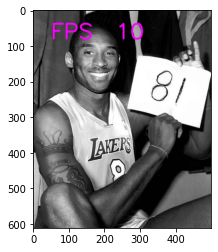

In [63]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('9.png')
img = cv2.putText(img, 'FPS  '+str(int(10)), (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 4, cv2.LINE_AA)

plt.imshow(img)


In [3]:
# 摄像头的实时显示
cap = cv2.VideoCapture(0)
while cap.isOpened():
    reval,frame = cap.read()
    cv2.imshow('live',frame)
    # 等待时间(延时，给图像显示时间)
    if cv2.waitKey(5) & 0xFF ==27:
        break
cap.release()
cv2.destroyAllWindows()

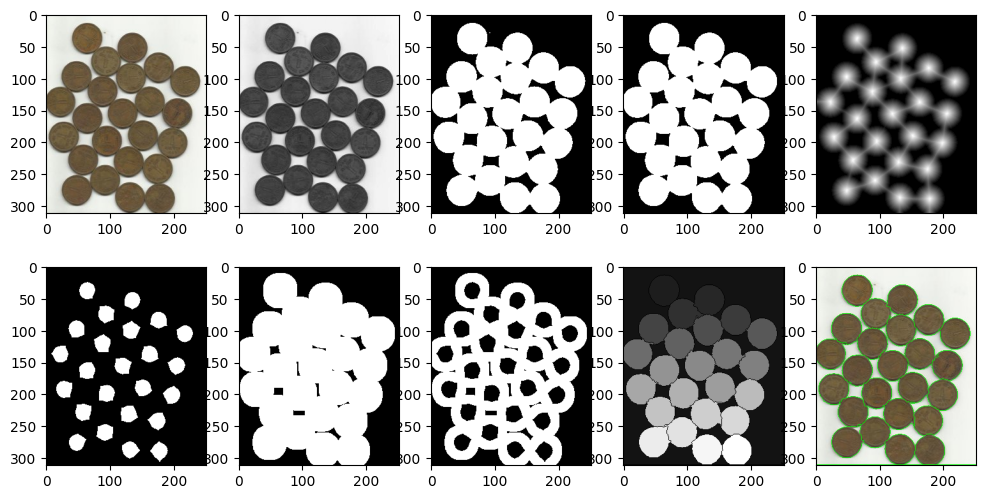

硬币的数量是24


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/coin.png') #img.shape返回：(312, 252, 3)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #img_gray.shape返回：(312, 252)

#------------Otsu阈值处理,变成二值图像--------------
t, otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)   #t返回162.0， otsu.shape返回(312, 252)

#------------形态学的开运算，就是先腐蚀erode后膨胀dilate,目的一是去噪，二是先把前景对象重叠的部分分开，方便后面计数或者画每个对象的轮廓-------------
img_opening = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel=np.ones((3,3), np.uint8), iterations=2)  #A 这还是一个二值图像

#-------计算距离,确定前景对象--------------------
dist = cv2.distanceTransform(img_opening, cv2.DIST_L2, 5)   #float32的浮点型数组，dist.shape返回(312, 252),dist是一个灰度图像
th, sure_fg = cv2.threshold(dist, 0.5*dist.max(), 255, cv2.THRESH_BINARY) #把dist阈值化处理，变成一个0和255的二值图像，此时就是我们要的确定前景
sure_fg = np.uint8(sure_fg)
#-----计算确定背景、计算未知区域------------------
sure_bg = cv2.dilate(img_opening, kernel=np.ones((3,3), np.uint8), iterations=3) #对前景膨胀来确定背景
unknown = cv2.subtract(sure_bg, sure_fg)  #确定背景图-确定前景图，生成未知区域图

#------标注确定前景图,调整标注规则---------------------------
ret, labels = cv2.connectedComponents(sure_fg)  #有24个硬币，ret返回是25, labels是一个形状是(312, 252)的int32的数组
labels = labels+1  #把背景标为1，前景对象依次为2，3，，，26
labels[unknown==255]=0  #0代表未知区域

#------------使用分水岭算法对图像进行分割---------------
img1 = img.copy()
markers = cv2.watershed(img1,labels)
img1[markers==-1]=[0,255,0] # 绿色边框

#可视化：
plt.figure(figsize=(12,6))
plt.subplot(251), plt.imshow(img[:,:,::-1])   #原图 RGB显示
plt.subplot(252), plt.imshow(img_gray, cmap='gray') #灰度图
plt.subplot(253), plt.imshow(otsu, cmap='gray')  #otsu阈值处理后的二值图
plt.subplot(254), plt.imshow(img_opening, cmap='gray')  #开运算去噪后的图像
plt.subplot(255), plt.imshow(dist, cmap='gray')   #距离图像
plt.subplot(256), plt.imshow(sure_fg, cmap='gray')  #确定前景
plt.subplot(257), plt.imshow(sure_bg, cmap='gray')  #确定背景
plt.subplot(258), plt.imshow(unknown, cmap='gray')  #确定未知区域图
plt.subplot(259), plt.imshow(labels, cmap='gray')  #标注图
plt.subplot(2,5,10), plt.imshow(img1[:,:,::-1])  #分割结果
plt.show()
print('硬币的数量是{}'.format(ret-1))